# Softmax Classifier

This exercise guides you through the process of classifying images using a Softmax classifier. As part of this you will:

- Implement a fully vectorized loss function for the Softmax classifier
- Calculate the analytical gradient using vectorized code
- Tune hyperparameters on a validation set
- Optimize the loss function with Stochastic Gradient Descent (SGD)
- Visualize the learned weights

In [58]:
# start-up code! 
import random

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from load_cifar10_tvt import load_cifar10_train_val

X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10_train_val()
print("Train data shape: ", X_train.shape)
print("Train labels shape: ", y_train.shape)
print("Val data shape: ", X_val.shape)
print("Val labels shape: ", y_val.shape)
print("Test data shape: ", X_test.shape)
print("Test labels shape: ", y_test.shape)

print(y_train)

Train, validation and testing sets have been created as 
 X_i and y_i where i=train,val,test
Train data shape:  (3073, 49000)
Train labels shape:  (49000,)
Val data shape:  (3073, 1000)
Val labels shape:  (1000,)
Test data shape:  (3073, 1000)
Test labels shape:  (1000,)
[6 9 9 ... 4 9 3]


Code for this section is to be written in `cs231n/classifiers/softmax.py`

In [66]:
# Now, implement the vectorized version in softmax_loss_vectorized.

import time

from cs231n.classifiers.softmax import softmax_loss_vectorized

# gradient check.
from cs231n.gradient_check import grad_check_sparse

W = np.random.randn(10, 3073) * 0.0001

tic = time.time()
loss, grad = softmax_loss_vectorized(W, X_train, y_train, 0.00001)
toc = time.time()
print("vectorized loss: %e computed in %fs" % (loss, toc - tic))

# As a rough sanity check, our loss should be something close to -log(0.1).
print("loss: %f" % loss)
print("sanity check: %f" % (-np.log(0.1)))

f = lambda w: softmax_loss_vectorized(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

vectorized loss: 2.313726e+00 computed in 0.258461s
loss: 2.313726
sanity check: 2.302585
numerical: -1.991805 analytic: -1.991805, relative error: 1.257603e-08
numerical: 0.264442 analytic: 0.264442, relative error: 1.599988e-08
numerical: 0.163876 analytic: 0.163876, relative error: 4.154324e-09
numerical: -1.016094 analytic: -1.016094, relative error: 2.332410e-08
numerical: 0.595810 analytic: 0.595810, relative error: 2.026923e-08
numerical: 1.274705 analytic: 1.274705, relative error: 2.648741e-08
numerical: 3.318612 analytic: 3.318612, relative error: 1.280526e-08
numerical: 0.102108 analytic: 0.102108, relative error: 6.440450e-07
numerical: 0.501746 analytic: 0.501746, relative error: 9.534353e-08
numerical: 0.126881 analytic: 0.126881, relative error: 5.524584e-07


Code for this section is to be written in`cs231n/classifiers/linear_classifier.py`

Text(0, 0.5, 'Loss value')

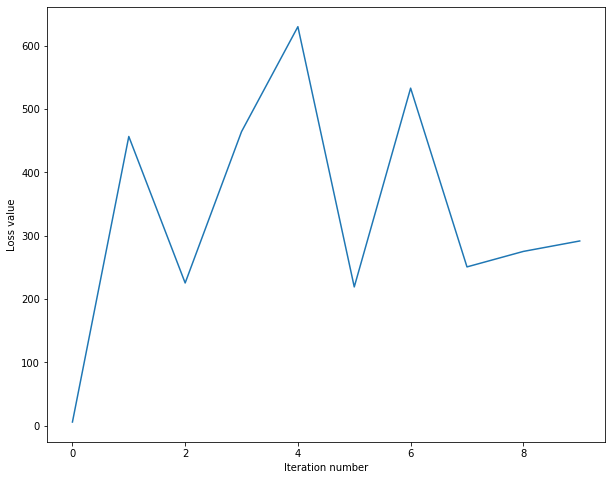

In [70]:
# Now that efficient implementations to calculate loss function and gradient of the softmax are ready,
# use it to train the classifier on the cifar-10 data
# Complete the `train` function in cs231n/classifiers/linear_classifier.py

from cs231n.classifiers.linear_classifier import Softmax

classifier = Softmax()
loss_hist = classifier.train(
    X_train,
    y_train,
    learning_rate=1e-3,
    reg=1e-5,
    num_iters=10,
    batch_size=200,
    verbose=False,
)
# Plot loss vs. iterations
plt.plot(loss_hist)
plt.xlabel("Iteration number")
plt.ylabel("Loss value")

In [71]:
# Complete the `predict` function in cs231n/classifiers/linear_classifier.py
# Evaluate on test set
y_test_pred = classifier.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print("softmax on raw pixels final test set accuracy: %f" % (test_accuracy,))

softmax on raw pixels final test set accuracy: 0.172000


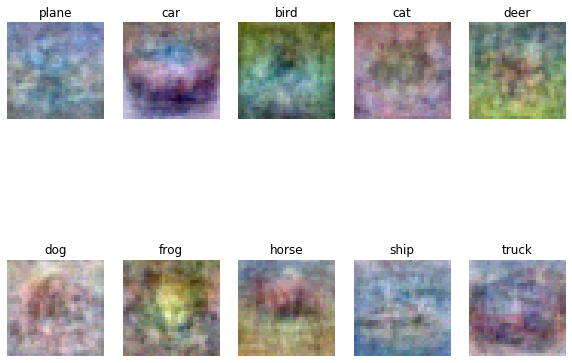

In [72]:
# Visualize the learned weights for each class
w = classifier.W[:, :-1]  # strip out the bias
w = w.reshape(10, 32, 32, 3)

w_min, w_max = np.min(w), np.max(w)

classes = [
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]
for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype("uint8"))
    plt.axis("off")
    plt.title(classes[i])